Natural Language Toolkit(NLTK) package is an open source python library for NLP. It has modules for collecting, handling and processing Twitter data.

In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random
     

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/shimaimani/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
print("number of positive tweets", len(all_positive_tweets))
print("number of negative tweets", len(all_negative_tweets))
print("type of  all tweets", type(all_negative_tweets))
print("type of  each tweets", type(all_negative_tweets[0]))

number of positive tweets 5000
number of negative tweets 5000
type of  all tweets <class 'list'>
type of  each tweets <class 'str'>


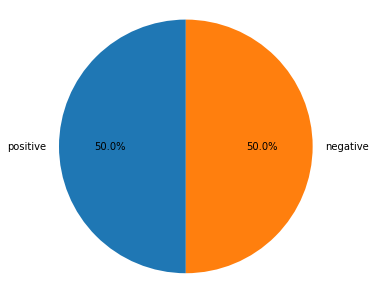

In [5]:
plt.figure(figsize = (5, 5))
labels = ['positive', 'negative']
sizes =  [len(all_positive_tweets), len(all_negative_tweets)]
plt.pie(sizes, labels=labels,autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

printing the random positive and random negative tweets to understand the data better

In [6]:
pos_idx = random.randint(0, len(all_positive_tweets)-1)
neg_idx = random.randint(0, len(all_negative_tweets)-1)
print("positive tweets:", all_positive_tweets[pos_idx])
print("negative tweets:", all_negative_tweets[neg_idx])


positive tweets: @square_rest we like this wonderful and original recipe! we share with #foiegras lovers! :)
negative tweets: @Kimwoobin89__ oppa............./hug ur arm/ why am I like this :(


### Process the row text

- tokenization
- lowerstring
- stemming
- removing stop words and punctuation

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shimaimani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


In [9]:
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


### We want to remove hashtag and hyperlink too.

In [10]:
print("before processing", tweet)

tweet2 = re.sub(r'^RT[\s]+', '', tweet)
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
tweet2 = re.sub(r'#', '', tweet2)


print("After processing", tweet2)


before processing My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
After processing My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### Tokenizing the string

In [11]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


### Removing stop words and Punctuation

In [12]:
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [13]:
tweets_clean = []
for w in tweet_tokens:
    if w not in stopwords_english and  w not in string.punctuation:
        tweets_clean.append(w)
tweets_clean

['beautiful',
 'sunflowers',
 'sunny',
 'friday',
 'morning',
 ':)',
 'sunflowers',
 'favourites',
 'happy',
 'friday',
 '…']

### Stemming 

In [14]:
stemmer = PorterStemmer() 
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  #
tweets_stem

['beauti',
 'sunflow',
 'sunni',
 'friday',
 'morn',
 ':)',
 'sunflow',
 'favourit',
 'happi',
 'friday',
 '…']

### Now let's put all the preprocessing steps in one func: process_tweets() which is located in utils.py

In [15]:
from utils import process_tweets

tweets = all_positive_tweets[10]
print(tweets)

clean_tweets = process_tweets(tweets)
print(clean_tweets)

#FollowFriday @wncer1 @Defense_gouv for being top influencers in my community this week :)
['followfriday', 'top', 'influenc', 'commun', 'week', ':)']


### Building word frequency

we want to create a build_freqs() function that given a tweet, it will out put three numbers [x0, x1, x2]
where x0 is one (bias term) and x1 is the sum of positive frequency and x2 sum of negative frequency of each tweet.

In [16]:
# from collections import defaultdict
# def build_freqs(tweets, ys):
#     """Building freqeuncy of tweets
#         Input:
#             tweet: a list of tweets
#             ys: an m by one of sentiment of each tweet
#         Output:
#             freqs: a dictionary mapping each (word, sentiment) pair to its frequency
            
#     """
#     freqs = defaultdict(int)
#     for i, tweet in enumerate(tweets):
#         for word in tweet:
#             freqs[(word, ys[i])] += 1
#     return freqs

In [17]:
tweets = all_positive_tweets + all_negative_tweets
ys = [1] * len(all_positive_tweets) + [0] * len(all_negative_tweets)


In [18]:
from utils import build_freqs

In [20]:
freqs = build_freqs(tweets, ys)


In [21]:
print(freqs)

defaultdict(<class 'int'>, {('followfriday', 1): 25, ('top', 1): 32, ('engag', 1): 7, ('member', 1): 16, ('commun', 1): 33, ('week', 1): 83, (':)', 1): 3568, ('hey', 1): 76, ('jame', 1): 7, ('odd', 1): 2, (':/', 1): 5, ('pleas', 1): 97, ('call', 1): 37, ('contact', 1): 7, ('centr', 1): 2, ('02392441234', 1): 1, ('abl', 1): 8, ('assist', 1): 1, ('mani', 1): 33, ('thank', 1): 620, ('listen', 1): 16, ('last', 1): 47, ('night', 1): 68, ('bleed', 1): 2, ('amaz', 1): 51, ('track', 1): 5, ('scotland', 1): 2, ('congrat', 1): 21, ('yeaaah', 1): 1, ('yipppi', 1): 1, ('accnt', 1): 2, ('verifi', 1): 2, ('rqst', 1): 1, ('succeed', 1): 1, ('got', 1): 69, ('blue', 1): 9, ('tick', 1): 1, ('mark', 1): 1, ('fb', 1): 6, ('profil', 1): 2, ('15', 1): 5, ('day', 1): 246, ('one', 1): 129, ('irresist', 1): 2, ('flipkartfashionfriday', 1): 17, ('like', 1): 233, ('keep', 1): 68, ('love', 1): 400, ('custom', 1): 4, ('wait', 1): 70, ('long', 1): 36, ('hope', 1): 141, ('enjoy', 1): 75, ('happi', 1): 211, ('friday'

### Let's visualize

In [26]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']
data = []
for word in keys:
    pos = freqs[(word, 1)]
    neg = freqs[(word, 0)]
    data.append((word, pos, neg))
data 

[('happi', 211, 25),
 ('merri', 1, 0),
 ('nice', 98, 19),
 ('good', 238, 101),
 ('bad', 18, 73),
 ('sad', 5, 123),
 ('mad', 4, 11),
 ('best', 65, 22),
 ('pretti', 20, 15),
 ('❤', 29, 21),
 (':)', 3568, 2),
 (':(', 1, 4571),
 ('😒', 1, 3),
 ('😬', 0, 2),
 ('😄', 5, 1),
 ('😍', 2, 1),
 ('♛', 0, 210),
 ('song', 22, 27),
 ('idea', 26, 10),
 ('power', 7, 6),
 ('play', 46, 48),
 ('magnific', 2, 0)]

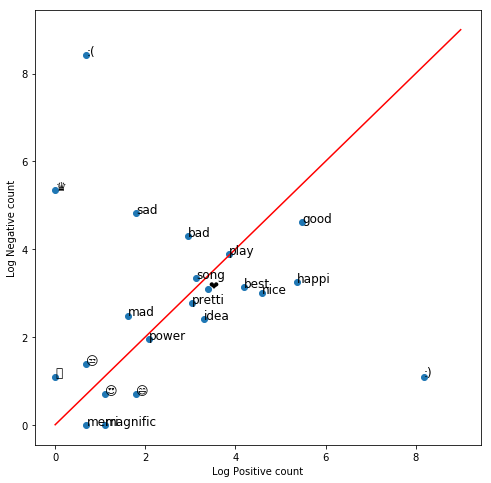

In [36]:
fig, ax = plt.subplots(figsize=(8,8))
import numpy as np
x = np.log([x[1] + 1 for x in data])
y = np.log([x[2] + 1 for x in data])
ax.scatter(x, y)

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)
ax.plot([0,9],[0,9],color='red')

This means symbols are very important and we should not get rid of them

### Logisitc regression model

### Extract features

In [ ]:
This function takes in a single tweet.
Process the tweet using the imported process_tweet() function and save the list of tweet words.
Loop through each word in the list of processed words
For each word, check the freqs dictionary for the count when that word has a positive '1' label. (Check for the key (word, 1.0)
Do the same for the count for when the word is associated with the negative label '0'. (Check for the key (word, 0.0).)
Make sure you handle cases when the (word, label) key is not found in the dictionary.
Search the web for hints about using the `.get()` method of a Python dictionary. Here is an example

In [53]:
def extract_features(tweet, freqs):
    """ extracting features from tweet
        Input:
            tweet
            freqs
        Output:
            bias, pos_freq, neg_freq, sentiment
    """

    positives = []
    negatives = []
    x = np.zeros((1, 3))
    x[0,0] = 1
    for word in process_tweets(tweet):
        x[0,1] += freqs[(word, 1)]
        x[0,2] += freqs[(word, 0)]
    assert(x.shape == (1, 3))
    return x
        
    

### train the model
    


In [77]:
Y = np.array(ys)
Y = np.resize(Y, (len(Y), 1))
X = np.zeros((len(tweets), 3))
for i, tweet in enumerate(tweets):
    X[i] = extract_features(tweet, freqs)
   

In [78]:
X

array([[1.000e+00, 3.764e+03, 7.200e+01],
       [1.000e+00, 4.464e+03, 5.170e+02],
       [1.000e+00, 3.759e+03, 1.600e+02],
       ...,
       [1.000e+00, 3.400e+01, 4.640e+03],
       [1.000e+00, 1.000e+01, 4.585e+03],
       [1.000e+00, 1.160e+02, 5.820e+02]])

In [80]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [155]:
def gradientDescent(X, y, theta, alpha, num_iter):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''

    m = len(y)
    epsilon = 1e-9
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        J = -1. /m * (np.dot(y.transpose(), np.log(h + epsilon)) + np.dot((1 - y).transpose(),np.log(epsilon + 1 - h)))
        theta = theta - alpha/m * np.dot(X.transpose(), (h - y))
       
    return J, theta





In [183]:
theta = np.random.normal(0, 0.01, (3, 1))

J, theta = gradientDescent(X, Y, np.zeros((3,1)), 1e-9, 3500)

In [184]:
J, theta

(array([[0.13733561]]), array([[ 1.52488629e-07],
        [ 8.11346962e-04],
        [-7.37533468e-04]]))

In [185]:
print(f"The cost after training is {J[0]}")
print(f"The resulting vector of weights is {theta}")

The cost after training is [0.13733561]
The resulting vector of weights is [[ 1.52488629e-07]
 [ 8.11346962e-04]
 [-7.37533468e-04]]


### Let's predict

In [186]:
def predict_tweet(tweet, freqs, theta):
    x = extract_features(tweet, freqs)
    z = np.dot(x, theta)
    return sigmoid(z)

In [187]:
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great', 'awesome', 'you are ugly']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am happy -> 0.538115
I am bad -> 0.490192
this movie should have been great. -> 0.531032
great -> 0.530590
great great -> 0.560953
great great great -> 0.590865
great great great great -> 0.620120
awesome -> 0.507597
you are ugly -> 0.499152


### Plot 

Text(0, 0.5, ' Negative ')

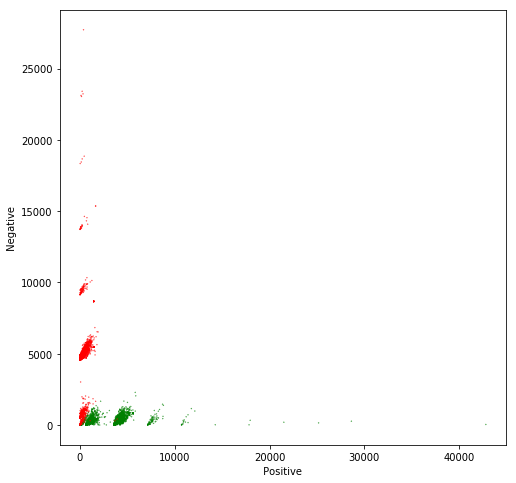

In [201]:
fig, ax = plt.subplots(figsize=(8,8))
colors = ['red', 'green']
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s=0.1)
plt.xlabel(" Positive ")
plt.ylabel(" Negative ")

We can create a line when the sigmoid function theta*x = 0
this means neg = - theta[0] - theta[1]/theta[2] * positive

In [202]:
def neg(theta, pos):
    return (- theta[0] - pos * theta[1]) / theta[2]

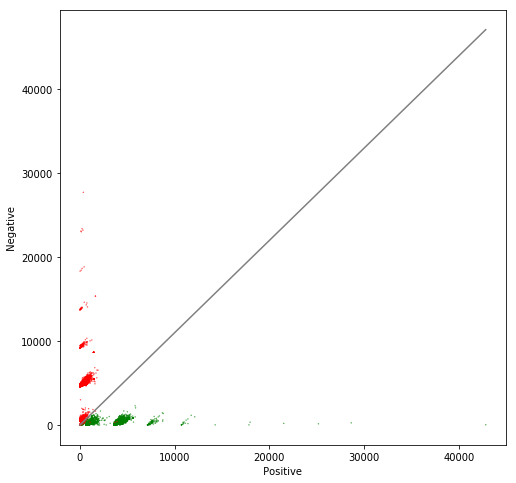

In [212]:
fig, ax = plt.subplots(figsize=(8,8))
colors = ['red', 'green']
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s=0.1)
plt.xlabel(" Positive ")
plt.ylabel(" Negative ")
maxpos = np.max(X[:,1])
plt.plot([0, maxpos], [neg(theta, 0), neg(theta, maxpos)], color = 'gray')

### Check the performance using test data

In [215]:
def test_logisitc_regression(test_x, test_y, freqs, theta):
    y_hat = []
    for i, tweet in enumerate(test_x):
        y_pred = predict_tweet(tweet, freqs, theta)
        if y_pred > 0.5:
            y_hat.append(1)
        else:
            y_hat.append(0)
    accuracy = (y_hat == np.squeeze(test_y)).sum() / len(test_y)
    return accuracy


### Error Analysis

We dig into the misclassification our model, this part is incompelete.

In [221]:

test_y = 1
tweet = "@MarkBreech Not sure it would be good thing 4 my bottom daring 2 say 2 Miss B but Im gonna be so stubborn on mouth soaping ! #NotHavingit :p"
y_hat = predict_tweet(tweet, freqs, theta)

